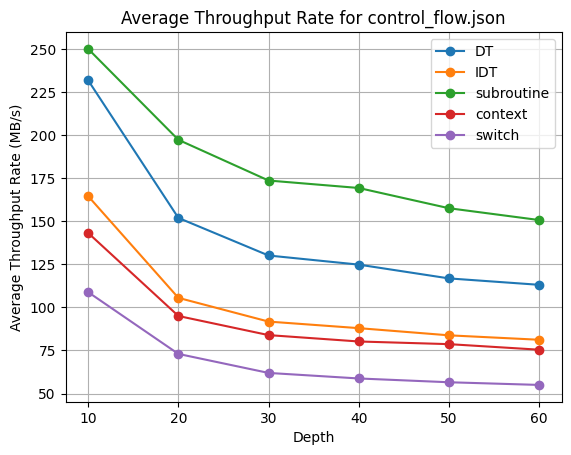

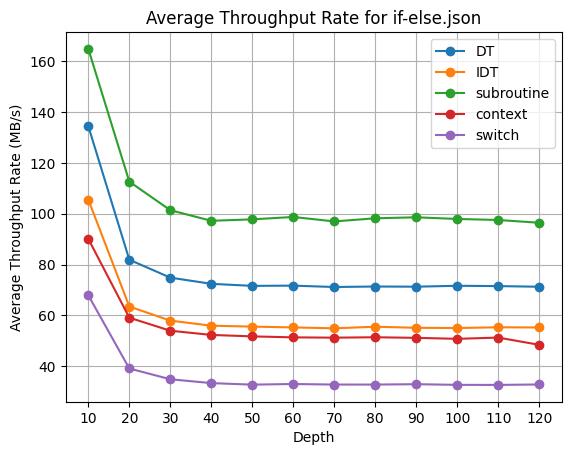

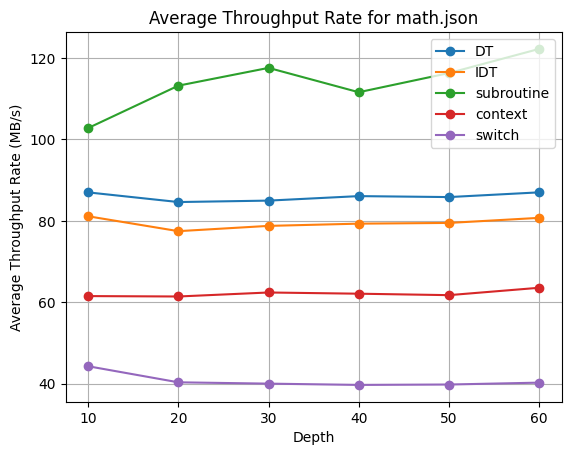

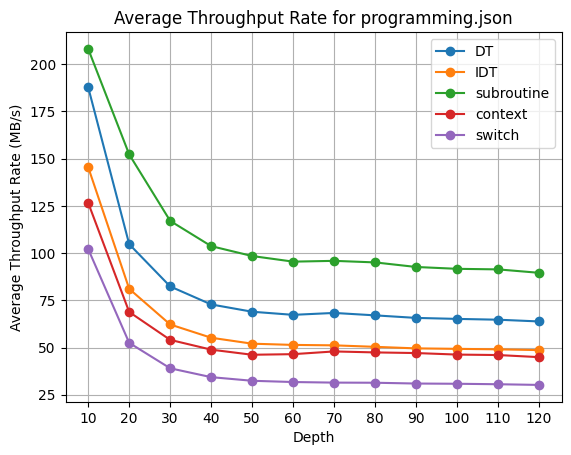

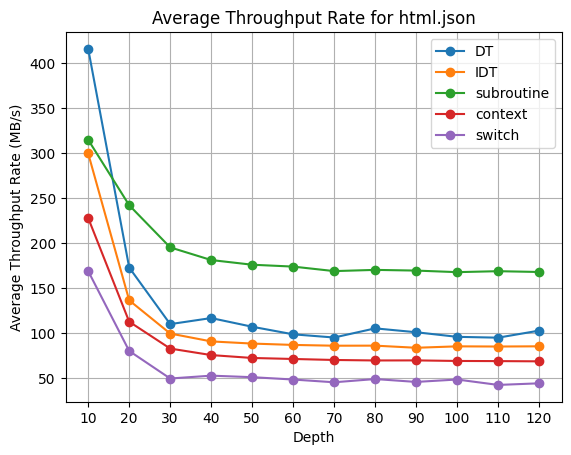

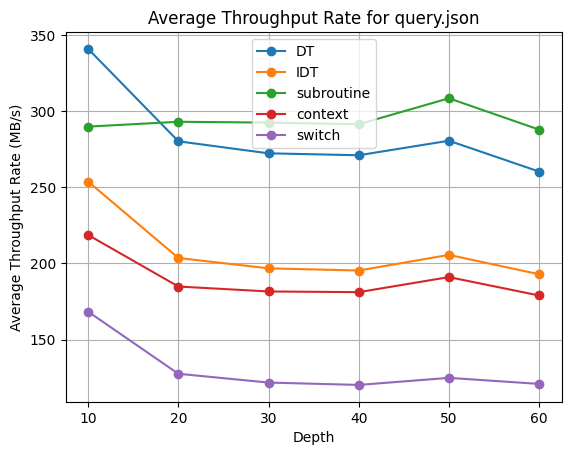

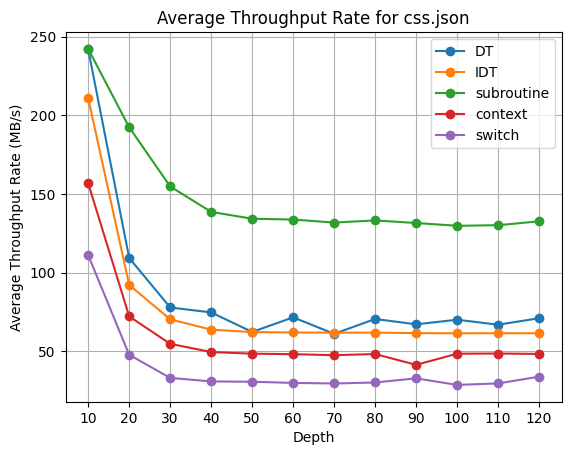

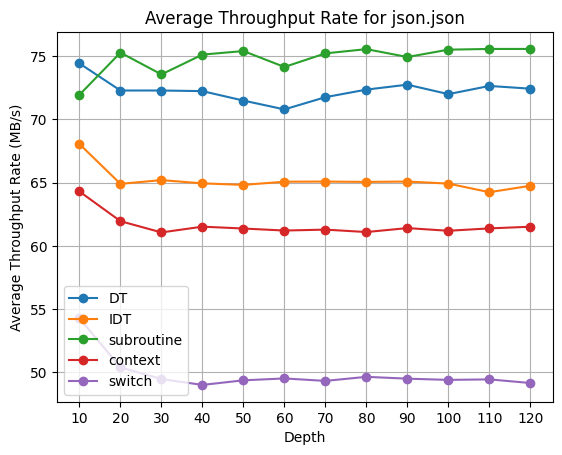

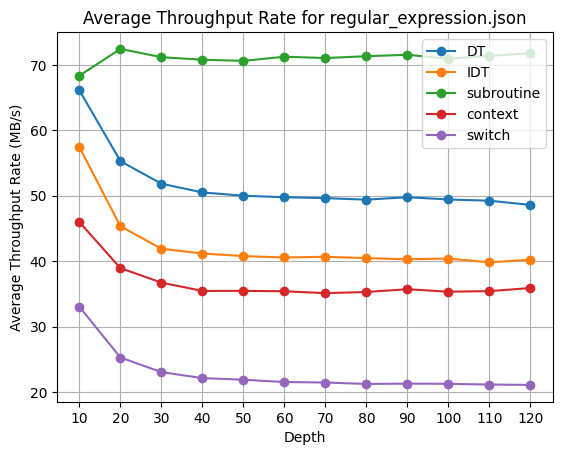

In [2]:
import csv
from matplotlib import pyplot as plt


csv_filename = 'results2.csv'

results = {}

with open(csv_filename, mode='r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        program_name = row['Program']
        file_name = row['File']
        dp = int(row['Depth'])
        avg_throughput_rate = float(row['Average Throughput Rate (MB/s)'])

        if program_name not in results:
            results[program_name] = {}
        if file_name not in results[program_name]:
            results[program_name][file_name] = {}

        if dp not in results[program_name][file_name]:
            results[program_name][file_name][dp] = []
        
        results[program_name][file_name][dp].append(avg_throughput_rate)

for file_name in {file_name for program_data in results.values() for file_name in program_data.keys()}:
    plt.figure()
    for program_name in results.keys():
        if file_name in results[program_name]:
            depths = sorted(results[program_name][file_name].keys())
            rates = [results[program_name][file_name][d] for d in depths]
            plt.plot([x for x in depths], rates, marker='o', label=program_name)
    
    plt.xlabel('Depth')
    plt.ylabel('Average Throughput Rate (MB/s)')
    plt.title(f'Average Throughput Rate for {file_name}')
    plt.legend()
    plt.grid(True)

    plt.xticks(depths, [str(d) for d in depths])

    plt.savefig(f"./result/{file_name}_throughput.png")
    plt.show()

In [3]:

import glob
import os

current_directory = os.getcwd()
files = glob.glob(os.path.join(current_directory, '*.fth'))
files += glob.glob(os.path.join(current_directory, '*.c'))
files += glob.glob(os.path.join(current_directory, '*.out'))
files += glob.glob(os.path.join(current_directory, '*.rs'))
for file in files:
    try:
        os.remove(file)
        print(f'Deleted: {file}')
    except Exception as e:
        print(f'Error deleting {file}: {e}')


Deleted: /Users/apple/gForthVM/json.c
